In [ ]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences # input sentences are of various lengths. To handle a large amount of data, it is more efficient to keep the length of the data constant. https://mmsankosho.com/en/nlp-simple-introduction-to-pad_sequences-and-timeseriesgenerator/
import numpy as np
import gensim # NLP no supervisado. https://www.tutorialspoint.com/gensim/gensim_quick_guide.htm
import pandas as pd

# Dataset: IMDB Movie reviews sentiment classification

In [ ]:
# ARMAMOS DATASET
num_words=30000
INDEX_FROM=3  # idx 0 => PAD, idx 1 => START, idx 2 => OOV (out of vocab.) # se deja espacio libre para usar codigos
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=num_words+2,)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# EXPLORAMOS NUM CATEGORIAS Y PALABRAS 
num_words=len(np.unique(np.hstack(data))) #hstack: Stack arrays in sequence horizontally (column wise).
print("Categories:", np.unique(targets)) 
print("Number of unique words:", num_words)

Categories: [0 1]
Number of unique words: 30000


In [ ]:
# EXPLORAMOS
#pd_data = pd.DataFrame(data)
#pd_data.head()
pd_training = pd.DataFrame(training_data)
pd_target = pd.DataFrame(training_targets)
print('**target sample:**');
pd_target.head()

**target sample:**


,0
0,1
1,0
2,0
3,1
4,0


In [ ]:
# EXPLORAMOS TRAINING
print('sample de training');
pd_training.head()

sample de training


,0
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5..."
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1..."
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1..."


In [ ]:
len(pd_training[0][3]) #traigo un sample x

550

Agregar el siguiente archivo al Google Drive

https://drive.google.com/open?id=1K5r423yMxBb1Yz2uDT7lto60lu1jqEjl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# EXPLORE: VEMOS CANT PALABRAS POR INSTANCIAS
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


In [ ]:
# EXPLORE: veamos el target y las palabras ejemplos para una instancia particular
print("Label:", targets[0])
print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


# Traemos el vocabulario y armamos indice reverso

In [ ]:
# le asigna a cada palabra un index
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - INDEX_FROM, "#") for i in data[1]] )
print(decoded)

1654784/1641221 [==============================] - 0s 0us/step
# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh a

In [ ]:
# TRAEMOS EMBEDDINGS
w2v = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/GoogleNews-vectors-negative300.bin", binary=True)  

In [ ]:
# EJ DE EMBEDDING PARA "CAR"
w2v.wv["car"] # https://radimrehurek.com/gensim/models/word2vec.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


array([ 0.13085938,  0.00842285,  0.03344727, -0.05883789,  0.04003906,
       -0.14257812,  0.04931641, -0.16894531,  0.20898438,  0.11962891,
        0.18066406, -0.25      , -0.10400391, -0.10742188, -0.01879883,
        0.05200195, -0.00216675,  0.06445312,  0.14453125, -0.04541016,
        0.16113281, -0.01611328, -0.03088379,  0.08447266,  0.16210938,
        0.04467773, -0.15527344,  0.25390625,  0.33984375,  0.00756836,
       -0.25585938, -0.01733398, -0.03295898,  0.16308594, -0.12597656,
       -0.09912109,  0.16503906,  0.06884766, -0.18945312,  0.02832031,
       -0.0534668 , -0.03063965,  0.11083984,  0.24121094, -0.234375  ,
        0.12353516, -0.00294495,  0.1484375 ,  0.33203125,  0.05249023,
       -0.20019531,  0.37695312,  0.12255859,  0.11425781, -0.17675781,
        0.10009766,  0.0030365 ,  0.26757812,  0.20117188,  0.03710938,
        0.11083984, -0.09814453, -0.3125    ,  0.03515625,  0.02832031,
        0.26171875, -0.08642578, -0.02258301, -0.05834961, -0.00

In [ ]:
# VER CUANTAS VARIABLES TIENE EL EMBEDDING
np.shape(w2v.wv["car"]) # un embedding q tiene 300 vars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


(300,)

# Armamos la matriz de embeddings

In [ ]:
# COMPLETAMOS CON ZEROS Y ARMAMOS LOS VALORES DE EMBEDDINGS PARA CADA UNA DE LAS 30000 PALABRAS
embed_dim=300
embedding_matrix=np.zeros([num_words+4,embed_dim])
for word, idx in index.items():
  if idx <= num_words and word in w2v.wv:
    embedding_matrix[idx+INDEX_FROM,:]=w2v.wv[word]
    
embedding_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


(30004, 300)

In [ ]:
embedding_matrix[100][:].shape

(300,)

# Hacemos que todos los reviews tengan el mismo largo

In [ ]:
maxlen=1000

In [ ]:
#pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.
data = pad_sequences(data, maxlen=maxlen, value=0.0) # data era training data + test data

In [ ]:
len(data[0])

1000

In [ ]:
len(data[1])

1000

In [ ]:
# vemos un ejemplo de como queda con pad sequences
data[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
data=np.array(data)

In [ ]:
data.shape

(50000, 1000)

# Armamos el modelo con una Conv1D

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam



In [ ]:
# explicacion teorica de CNN para embeddings, word2vec embeddings y como funciona: 
# https://cezannec.github.io/CNN_Text_Classification/

# para seguir:
# https://towardsdatascience.com/nlp-with-cnns-a6aa743bdc1e
# https://ml2021.medium.com/multi-class-text-classification-using-cnn-and-word2vec-b17daff45260

# cuando haces 1 factor:

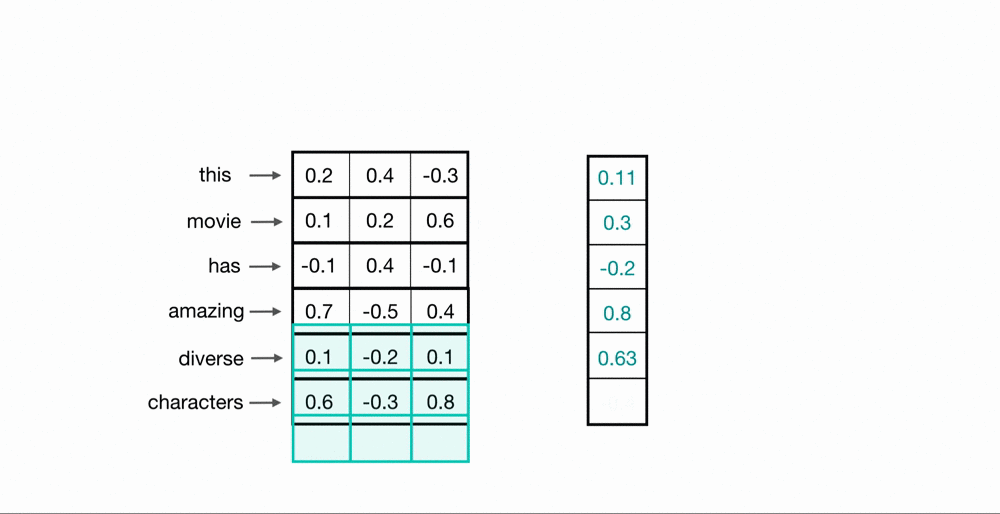
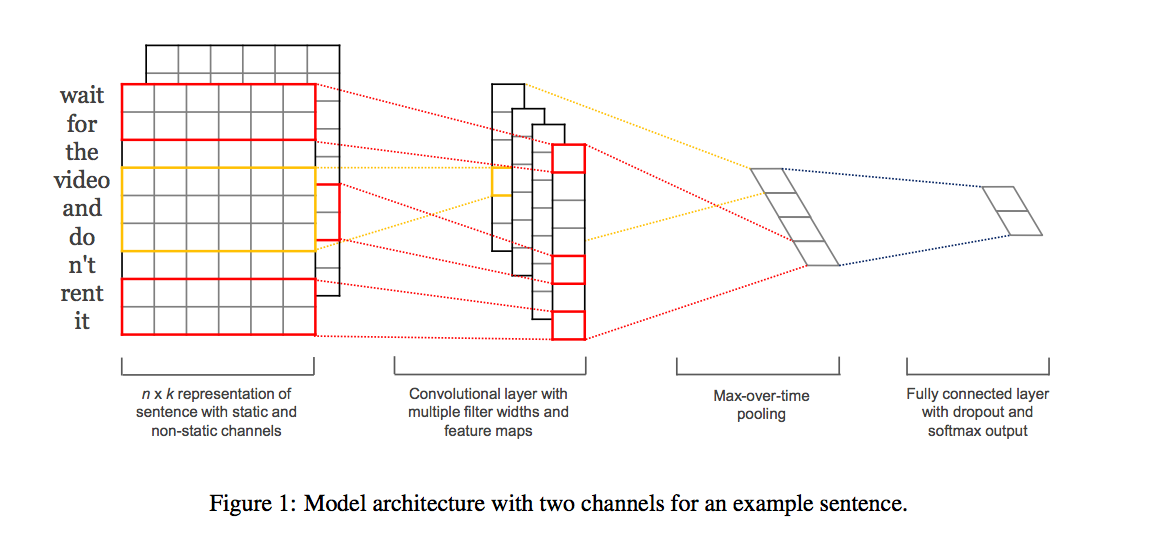

In [ ]:
# DEFINIMOS DONDE IMPORTAMOS EL CALLBACK DE TENSORBOARD
from tensorflow.keras import callbacks
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/")

In [ ]:
# DEFINE THE MMODEL
# Hacemos modelo en keras, incorporando el embedding, haciendo CNN 1D, max pooling, etc:
nb_words=num_words+4
num_filters=64
model = Sequential()
model.add(Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters*2, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #multi-label (k-hot encoding)

# COMPILE THE MODEL
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 300)         9001200   
                                                                 
 conv1d_6 (Conv1D)           (None, 1000, 64)          134464    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 500, 64)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 500, 128)          57472     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# FIT THE MODEL
# // RE QUE ESTA OVERFITEANDO:
#  loss: 0.0240 - accuracy: 0.9907 - val_loss: 0.6539 - val_accuracy: 0.8938
model.fit(data,targets,batch_size=32,epochs=20,validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/20
1250/1250 [==============================] - 17s 13ms/step - loss: 0.3825 - accuracy: 0.8223 - val_loss: 0.3058 - val_accuracy: 0.8670
Epoch 2/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.2770 - accuracy: 0.8860 - val_loss: 0.2519 - val_accuracy: 0.8968
Epoch 3/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.2304 - accuracy: 0.9079 - val_loss: 0.2577 - val_accuracy: 0.8980
Epoch 4/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.1870 - accuracy: 0.9261 - val_loss: 0.2887 - val_accuracy: 0.8793
Epoch 5/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.1510 - accuracy: 0.9424 - val_loss: 0.2539 - val_accuracy: 0.8968
Epoch 6/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.1166 - accuracy: 0.9559 - val_loss: 0.3056 - val_accuracy: 0.8948
Epoch 7/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.0942 - accuracy: 0.9653 - val_loss: 0.3143 -

In [ ]:
# proximos pasos:
# 1. predecir algo
# evaluate the model
model.predict()

NameError: ignored

# SAVE / LOAD MODEL

Keras separates the concerns of saving your model architecture and saving your model weights.

Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.

The model structure can be described and saved using two different formats: JSON and YAML.

--------------------
**Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.**

Saving the model in this way includes everything we need to know about the model, including:

    Model weights.
    Model architecture.
    Model compilation details (loss and metrics).
    Model optimizer state.

This means that we can load and use the model directly, without having to re-compile it as we did in the examples above.


In [ ]:
# ---------------------------- SAVE MODEL --------------------
# save model and architecture to single file
model.save("word2vec_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# lo copiamos al drive
%cp  /content/word2vec_model.h5 /content/drive/MyDrive/word2vec_model.h5

In [ ]:
# ----------------------------- LOAD MODEL ------------------------
from tensorflow.keras import models 
# SI QUEREMOS CARGAR EL MODELO
%cp  /content/drive/MyDrive/word2vec_model.h5 /content/word2vec_model.h5
my_h5_saved_model = models.load_model('/content/word2vec_model.h5')

# TENSORBOARD

In [ ]:
#### CARGAR TENSORBOARD

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
%tensorboard --logdir logs/

<IPython.core.display.Javascript object>

# EXPLORE AREA


In [ ]:
data[1].shape

(1000,)

In [ ]:
data.shape

(50000, 1000)

In [ ]:
p=model.predict(data)

In [ ]:
model.predict(data[51:500]).round(2)

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.97],
       [1.  ],
       [1.  ],
       [0.89],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.99],
       [1.  ],
       [0.01],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.98],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.88],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.

In [ ]:
from keras.preprocessing.text import Tokenizer

test_text =["She should not have been allowed to rule on this with the conflict of interest.\
She should have removed herself. Should be a slam dunk appeal on that grounds alone."]
test_seq = Tokenizer.texts_to_sequences(test_text)


TypeError: ignored